In [83]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt


In [84]:
def plot_training_curves(
    acc, labels, title,
    save_name
):
    fig, ax = plt.subplots(figsize=(20,6))
#     ax.bar(label, acc)
    
    plt.scatter(range(len(acc)), acc, label="Train Loss", s=100)
#     ax.plot(acc, label="Train Loss")
#     ax.plot(val_loss, label="Validation Loss")
    ax.legend(loc='best')
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Attack", fontsize=14)
    ax.set_ylabel("Accuracy", fontsize=14)
    plt.xticks(ticks=np.arange(len(labels)), labels=labels)
    
    plt.savefig(f"./{save_name}")
    plt.show()

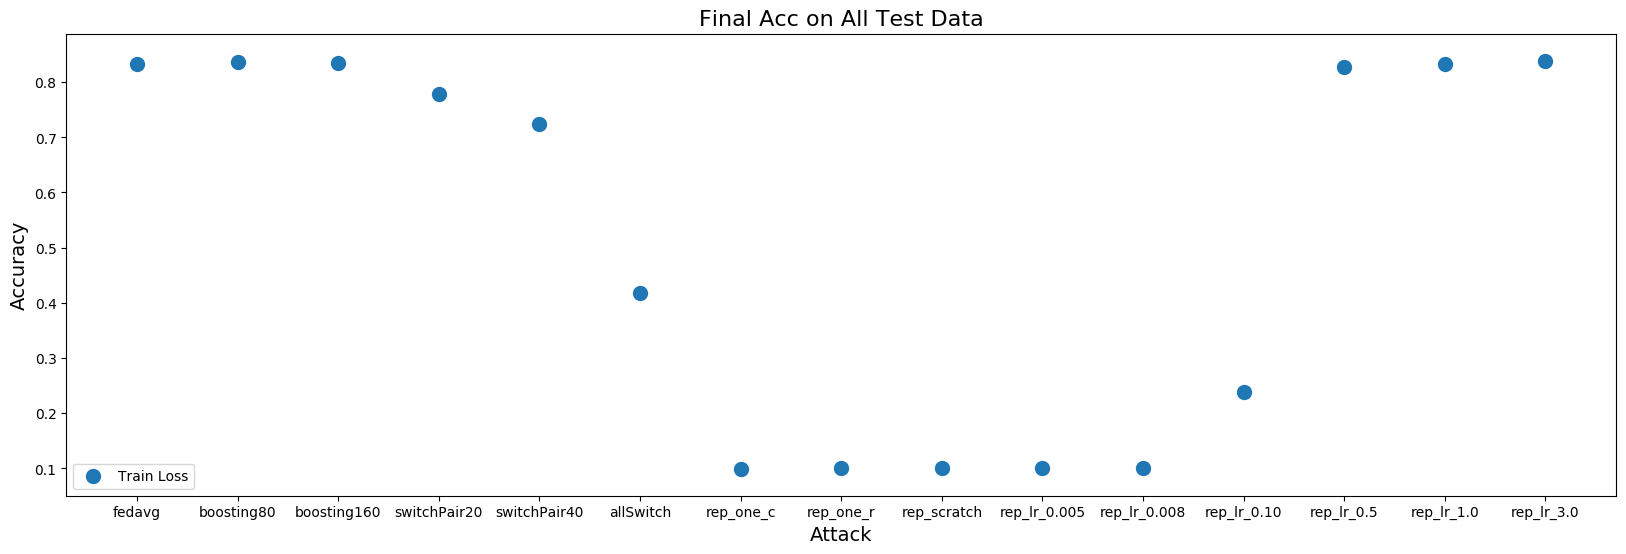

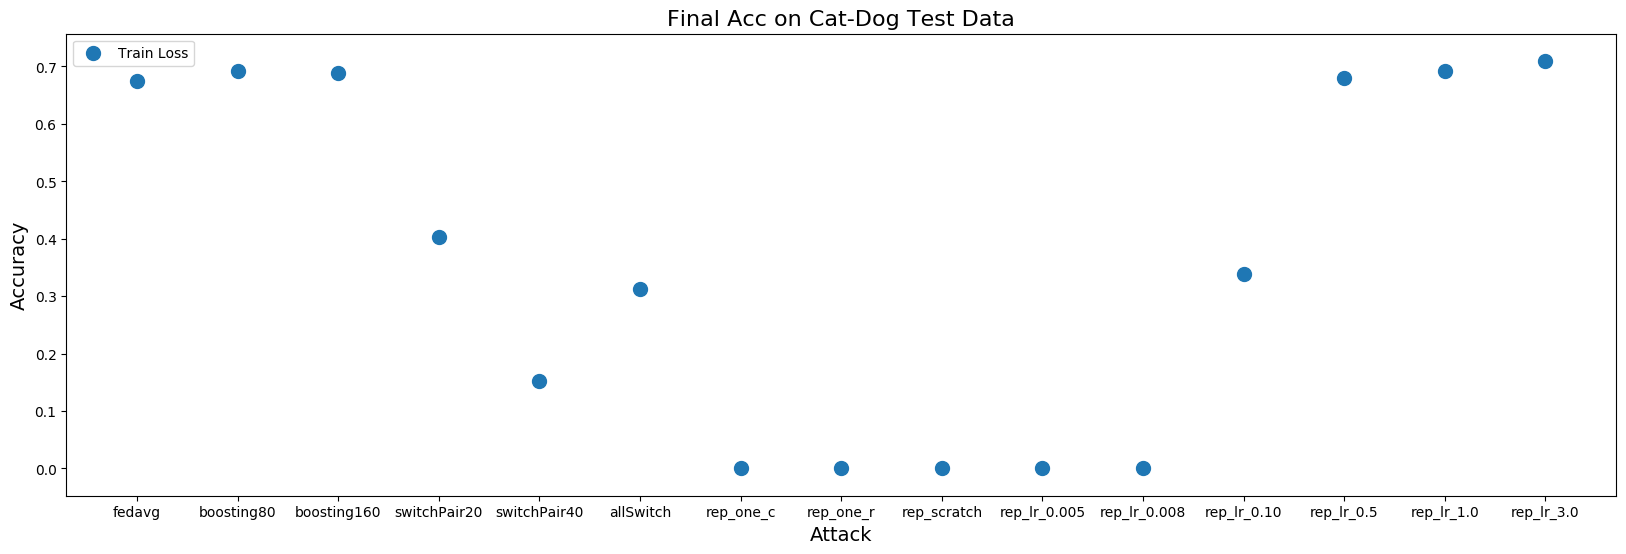

In [86]:
boosing = [
    f"/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting{(2**i)*20}/eval/" for i in range(4)
]

labels = [
    "fedavg",
    
#     "boosting20",
#     "boosting40",
    "boosting80",
    "boosting160",
    
    "switchPair20",
    "switchPair40",
    "allSwitch",
    
#     "replace",
#     "rep_consist",
#     "rep_one_c_fail",
    "rep_one_c",
    "rep_one_r",
    "rep_scratch",
    
    "rep_lr_0.005", 
    "rep_lr_0.008", 
    "rep_lr_0.10", 
    "rep_lr_0.5", # 0.5
    "rep_lr_1.0", # 1.0
    "rep_lr_3.0", # 3.0
]

all_label_acc = [
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_all_acc.npy",
    
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting20/eval/boosting20_all_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting40/eval/boosting40_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting80/eval/boosting80_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting160/eval/boosting160_all_acc.npy",
    
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/switchPair20_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/switchPair40/eval/switchPair40_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_all_acc.npy",
    
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement/eval/replace_all_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement_consist/eval/replace_all_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement_one_atk_fail/eval/replace_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replacement_one_atk/eval/replace_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replacement_one_round/eval/replace_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/from_scratch_one_r/eval/scratch_all_acc.npy",
    
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_005/eval/rep_lr005_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_008/eval/rep_lr008_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_0010/eval/rep_lr0010_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_0/eval/rep_lr0_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_1/eval/rep_lr1_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_3/eval/rep_lr3_all_acc.npy",
]
pair_label_acc = [
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_pair_acc.npy",
    
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting20/eval/boosting20_pair_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting40/eval/boosting40_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting80/eval/boosting80_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting160/eval/boosting160_pair_acc.npy",
    
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/switchPair20_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/switchPair40/eval/switchPair40_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_pair_acc.npy",
   
    
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement/eval/replace_pair_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement_consist/eval/replace_pair_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement_one_atk_fail/eval/replace_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replacement_one_atk/eval/replace_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replacement_one_round/eval/replace_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/from_scratch_one_r/eval/scratch_pair_acc.npy",
    
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_005/eval/rep_lr005_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_008/eval/rep_lr008_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_0010/eval/rep_lr0010_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_0/eval/rep_lr0_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_1/eval/rep_lr1_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_3/eval/rep_lr3_pair_acc.npy",
]

all_label_avg_acc = []
for i in all_label_acc:
    res = np.load(i)
    all_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )

plot_training_curves(
    all_label_avg_acc, labels, "Final Acc on All Test Data",
    "test_on_all_label.pdf"
)

pair_label_avg_acc = []
for i in pair_label_acc:
    res = np.load(i)
    pair_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )
    
plot_training_curves(
    pair_label_avg_acc, labels, "Final Acc on Cat-Dog Test Data",
    "test_on_pair_label.pdf"
)


labels = [
    "fedavg",
    
#     "boosting20",
#     "boosting40",
    "boosting80",
    "boosting160",
    
    "switchPair20",
    "switchPair40",
    "allSwitch",
    
#     "replace",
#     "rep_consist",
#     "rep_one_c_fail",
    "rep_one_c",   # 0.03
    "rep_one_r",   # 0.03
    "rep_scratch", # 0.03
    
    # all one round & one client
    "rep_lr_0.005", 
    "rep_lr_0.008", 
    "rep_lr_0.10", 
    "rep_lr_0.5", 
    "rep_lr_1.0", 
    "rep_lr_3.0", 
]